<a href="https://colab.research.google.com/github/gnitnaw/LDL/blob/main/tf_framework/c8e1_resnet_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
The MIT License (MIT)
Copyright (c) 2021 NVIDIA
Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""


'\nThe MIT License (MIT)\nCopyright (c) 2021 NVIDIA\nPermission is hereby granted, free of charge, to any person obtaining a copy of\nthis software and associated documentation files (the "Software"), to deal in\nthe Software without restriction, including without limitation the rights to\nuse, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of\nthe Software, and to permit persons to whom the Software is furnished to do so,\nsubject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS\nFOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR\nCOPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER\nIN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OU

This code example demonstrates how to use a pre-trained residual network to solve an image classification problem, using a picture of a dog. More context for this code example can be found in the section "Programming Example: Use a Pretrained ResNet Implementation" in Chapter 8 in the book Learning Deep Learning by Magnus Ekman (ISBN: 9780137470358).

We start with a number of import statements.

In [2]:
import numpy as np
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import \
    decode_predictions
import matplotlib.pyplot as plt
import tensorflow as tf
import logging
from google.colab import drive
drive.mount('/content/drive')
path_head = '/content/drive/MyDrive/Colab Notebooks/' # You have to change this. 

tf.get_logger().setLevel(logging.ERROR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In the next code snippet, we then load the image with the function load_img, which will return an image in PIL format. We specified that we want the picture to be scaled to 224×224 pixels because that is what the ResNet-50 implementation expects. We then convert the image into a NumPy tensor to be able to present it to our network. The network expects an array of multiple images, so we add a fourth dimension; consequently, we have an array of images with a single element.

In [3]:
# Load image and convert to 4-dimensional tensor.
DOG_FILENAME = path_head+'data/dog.jpg'
CAT_FILENAME = path_head+'data/cat.jpg'
image = load_img(DOG_FILENAME, target_size=(224, 224))
image_np = img_to_array(image)
image_np = np.expand_dims(image_np, axis=0)

image_cat = load_img(CAT_FILENAME, target_size=(224, 224))
image_cat_np = img_to_array(image_cat)
image_cat_np = np.expand_dims(image_cat_np, axis=0)

The final code snippet shows how to load the ResNet-50 model, using weights that have been trained using the ImageNet dataset. Just as we did in previous examples, we standardize the input images because the ResNet-50 model expects them to be standardized. The function preprocess_input does that for us, using parameters derived from the training dataset that was used to train the model. We present the image to the network by calling model.predict() and then print the predictions after first calling the convenience method decode_predictions(), which retrieves the labels in textual form.


49152/35363 [=========================================] - 0s 0us/step
predictions =  [[('n02091134', 'whippet', 0.50009334), ('n02085620', 'Chihuahua', 0.057942975), ('n02111889', 'Samoyed', 0.055593167), ('n02109961', 'Eskimo_dog', 0.046852462), ('n04033995', 'quilt', 0.025647068)]]


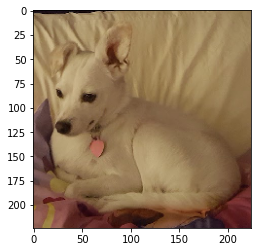

In [4]:
# Load the pretrained model.
model = resnet50.ResNet50(weights='imagenet')
# Standardize input data.
X = resnet50.preprocess_input(image_np.copy())
# Do prediction.
y = model.predict(X)
predicted_labels = decode_predictions(y)
print('predictions = ', predicted_labels)

# Show image.
plt.imshow(np.uint8(image_np[0]))
plt.show()


predictions =  [[('n02123045', 'tabby', 0.17037013), ('n02124075', 'Egyptian_cat', 0.10907391), ('n02870880', 'bookcase', 0.102578185), ('n03793489', 'mouse', 0.07664514), ('n03085013', 'computer_keyboard', 0.06161583)]]


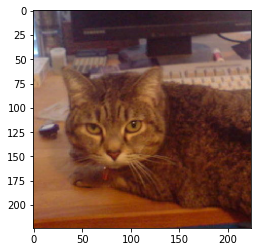

In [5]:
X2 = resnet50.preprocess_input(image_cat_np.copy())
# Do prediction.
y2 = model.predict(X2)
predicted_labels = decode_predictions(y2)
print('predictions = ', predicted_labels)

# Show image.
plt.imshow(np.uint8(image_cat_np[0]))
plt.show()